1. This notebook applies all rules created in parser.py to the dataframe
Due to privacy of the data, only 2 rules are shown in this repo
The first is based on a usual re, the second is based on yargy parsing

2. It also might work with some 'typo' mistakes

# Imports 

In [1]:
import pandas as pd
import re
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import ast
%matplotlib inline 
#from skoltech_cardiology.src.ehrparser.parser import EMHRParser
from ehrparser.parser import EMHRParser
import multiprocessing
import os
from ehrparser.parser import Version
import sys
import pickle
sys.setrecursionlimit(999000)
Version()
os.getcwd()

This version was updated 10.05.2021
dict_keys([' фибрилляции ', ' фибрилляция ', ' фибриляции ', ' фибриляция ', ' фибрилляцияи ', ' Фибрилляция ', ' фибрилляцию ', ' фибриляций ', ' фибрилляций ', ' фибрилляцией ', ' фибрилляци ', ' фибриллляции ', ' фибрилляуции ', ' фибрилляциии ', ' Фибрилляции ', ' фибрялляция ', ' фибрилляцяи ', ' фибилляции ', ' фибриллияции ', ' фибриллиция ', ' фиблилляции ', ' фибрилляуии ', ' фибриляцмя ', ' Фибриляция ', ' фирилляции ', ' фебрилляции ', ' Фибриляции ', ' фибрилляцмия ', ' фибриллации ', ' фибрилляуия ', ' фибриллляция ', ' Фибриллация ', ' фиблрилляции ', ' фбрилляции ', ' фибприлляция ', ' Фибрилллляциия ', ' пароксизмальная ', ' пароксизмальной ', ' Пароксизмальная ', ' Пароксизмальные ', ' пароксизмальное ', ' пакоксизмальная ', ' парксизмальная ', ' паросизмальная ', ' пароксизмальая ', ' пароксизмальных ', ' Пароксизмальное ', ' пароксизмальными ', ' пароксимазльная ', ' пароксимальная ', ' парокзизмальная ', ' пароксизмального ', ' па

'C:\\Users\\nikita.khromov\\PhD Studies\\Python\\Git_project\\MMDF-multimodal-medical-features\\Text features'

# Methods 

In [2]:
def file_listing(path, condition):
    file_path_list = []
    for r, d, f in os.walk(path):
        for file in f:
            #print(path)
            if condition in file:
                file_path = os.path.join(r, file)
                file_path_list.append(file_path)    
    return file_path_list

def df_to_dic_list(df, column):
    rez = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        if str(row[column]).startswith('{') and str(row[column]).endswith('}'):
            rez.append(ast.literal_eval(row[column]))
        else:
            rez.append({})
    return rez

def parsing(folder, condition):
    file_list = file_listing(folder, condition)
    df = pd.DataFrame()
    parser = EMHRParser(progress_bar=tqdm)
    for item in file_list:
        df_processed = pd.read_csv(item, index_col = 0)
        #df_processed_test = df_processed.iloc[100:200]
        list_ = df_to_dic_list(df_processed)
        results = parser(list_, n_jobs = 40, lib = 'joblib')
        print(item, 'conversion_completed')
        df_processed = df_processed.reset_index(drop=True)
        df_processed_final = pd.concat([df_processed, results], axis=1, sort=False)
        df = df.append(df_processed_final, ignore_index = True)
    return df



# This has to be a csv file where annonymized_html is a column with dictionaries containing diagnosis, recommendations, etc. 

In [ ]:
path = '../../../Cardio_files/Full/DF_GLOBAL_with_files_3.12.csv'
df = pd.DataFrame()
df_processed = pd.read_csv(path, index_col = 0)

In [ ]:
list_ = df_to_dic_list(df_processed, 'annonymized_html')

In [ ]:
results = parser(list_, n_jobs = 40, lib = 'joblib')

In [ ]:
df2 = df_processed
df2 = df2.reset_index(drop=True)
df_processed_final = pd.concat([df2, results], axis=1, sort = False)
df_processed_final.drop(columns=['parsed_html','atherosclerosis','annonymized_html'], inplace = True)
#df_processed_final.to_csv('/notebook/Cardio_files/Full/Results_full_04.12.csv')
df_processed_final.to_csv('/notebook/Cardio_files/Full/Results_10_05_21.csv')

### df_processed_final is a file, containing parsed data

Scores of comparison with validation samples

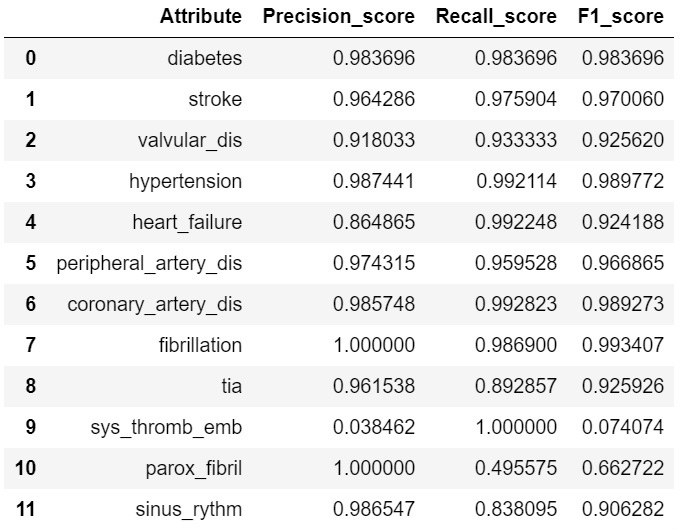

In [3]:
from IPython.display import Image
Image(filename='scores.jpg')